<a href="https://colab.research.google.com/github/NaufalFikriansyah/SentimentAnalysis_CollegeMenfess/blob/main/Sentiment_CollegeMenfess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import re

Membaca dataset dan merubah dataset dari categorical menjadi numeric. Positive = 0 dan Negative = 1

In [ ]:
df = pd.read_csv('collegemenfess.csv')

In [ ]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1603569991151804417,1603569991151804417,2022-12-16 08:57:33 WIB,2022-12-16,08:57:33,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1603569910097285120,1603569910097285120,2022-12-16 08:57:14 WIB,2022-12-16,08:57:14,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1603569275658448896,1603569275658448896,2022-12-16 08:54:42 WIB,2022-12-16,08:54:42,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1603569076390924289,1603569076390924289,2022-12-16 08:53:55 WIB,2022-12-16,08:53:55,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1603568860145528832,1603568860145528832,2022-12-16 08:53:03 WIB,2022-12-16,08:53:03,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(columns=['id','conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id',"username", "name", "place", "language", "mentions", "urls", "photos", "replies_count", "retweets_count", "geo", "source", "user_rt_id", "user_rt", "retweet_id", "reply_to", "retweet_date", "translate", "trans_src", "trans_dest", "likes_count", "hashtags", "cashtags", "link", "retweet", "quote_url", "video", "thumbnail", "near"])


In [ ]:
df

,tweet
0,[cm] smt 5 mending ikut studi independen dulu ...
1,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,[cm] Alhamdulilah masih bisa hidup walaupun di...
...,...
9855,[cm] teman-teman ada yg mau bantu like tugas y...
9856,meronta-ronta 😭 mending ngerjain sendiri deh asli
9857,[cm] aku disuruh bikin makalah (bukan peneliti...
9858,"[cm] Semangat UAS nya temen” semua, btw dr0p m..."


In [ ]:
#https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

# CLEANING DATA

In [ ]:
def remove(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return text

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: remove(x))
df.head(20)

,tweet
0,cm smt 5 mending ikut studi independen dulu ap...
1,cm di kampus kalian mahasiswa s1 wajib publish...
2,cm Bisa gk yh tugas UAS ini ngerjain dirinya s...
3,CM Dosen praktikum aku ngasih ini waktu pertem...
4,cm Alhamdulilah masih bisa hidup walaupun dika...
5,cm mini skripsi tu jurnal bkn aku bru smt 3 ka...
6,cm habis sempro kan banyak revisian Nah minta ...
7,cm adakah yang tahu pihak yang bisa membantu m...
8,Cm angkatan 2019 ada yg udah sidang skripsi
9,cm sebelumnya makasih yg udah mauu bantu jawab


In [ ]:
def hapus(tweet):
    tweet = re.sub(r'\$\w*','', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub('[0-9]+', '', tweet)

    return tweet

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: hapus(x))
df.head(20)

,tweet
0,cm smt mending ikut studi independen dulu apa...
1,cm di kampus kalian mahasiswa s wajib publish ...
2,cm Bisa gk yh tugas UAS ini ngerjain dirinya s...
3,CM Dosen praktikum aku ngasih ini waktu pertem...
4,cm Alhamdulilah masih bisa hidup walaupun dika...
5,cm mini skripsi tu jurnal bkn aku bru smt kag...
6,cm habis sempro kan banyak revisian Nah minta ...
7,cm adakah yang tahu pihak yang bisa membantu m...
8,Cm angkatan ada yg udah sidang skripsi
9,cm sebelumnya makasih yg udah mauu bantu jawab


In [ ]:
df['tweet']=df['tweet'].str.lower()
df.head(20)

,tweet
0,cm smt mending ikut studi independen dulu apa...
1,cm di kampus kalian mahasiswa s wajib publish ...
2,cm bisa gk yh tugas uas ini ngerjain dirinya s...
3,cm dosen praktikum aku ngasih ini waktu pertem...
4,cm alhamdulilah masih bisa hidup walaupun dika...
5,cm mini skripsi tu jurnal bkn aku bru smt kag...
6,cm habis sempro kan banyak revisian nah minta ...
7,cm adakah yang tahu pihak yang bisa membantu m...
8,cm angkatan ada yg udah sidang skripsi
9,cm sebelumnya makasih yg udah mauu bantu jawab


In [ ]:

!pip install emoji
!pip install sastrawi
!pip install PySastrawi
!pip install preprocessor
!pip3 install googletrans==3.1.0a0
!pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
file_stopwords = open('idStopwords.txt','r')
get_stopwords = file_stopwords.read()
stopwords_add = get_stopwords.split('\n')
file_stopwords.close()

stop_factory = StopWordRemoverFactory().get_stop_words()
data = stop_factory+stopwords_indonesia
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)

factory = StemmerFactory()
stemmer = factory.create_stemmer()

from nltk.tokenize import TweetTokenizer

def CleanTweet(tweet):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_token = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_token:
        if(word not in data and word not in stopwords_add and word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    return tweets_clean

df['TweetStop'] = df['tweet'].apply(lambda x: CleanTweet(x))
df.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,TweetStop
0,cm smt mending ikut studi independen dulu apa...,"[mending, studi, independen, magang, yaa, seme..."
1,cm di kampus kalian mahasiswa s wajib publish ...,"[kampus, mahasiswa, wajib, publish, jurnal, in..."
2,cm bisa gk yh tugas uas ini ngerjain dirinya s...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ..."
3,cm dosen praktikum aku ngasih ini waktu pertem...,"[dosen, praktikum, ngasih, temu, kelas, haru, ..."
4,cm alhamdulilah masih bisa hidup walaupun dika...,"[alhamdulilah, hidup, kasi, include, kos, kuli..."
5,cm mini skripsi tu jurnal bkn aku bru smt kag...,"[mini, skripsi, tu, jurnal, bkn, bru, kaget, d..."
6,cm habis sempro kan banyak revisian nah minta ...,"[habis, sempro, revisi, bimbing, revisi, dosji..."
7,cm adakah yang tahu pihak yang bisa membantu m...,"[ada, bantu, beasiswa, kampus, sender, terima,..."
8,cm angkatan ada yg udah sidang skripsi,"[angkat, udah, sidang, skripsi]"
9,cm sebelumnya makasih yg udah mauu bantu jawab,"[makasih, udah, mauu, bantu]"


In [ ]:
def fittweet(text):
    text = np.array(text)
    text = ' '.join(text)
    return text

df ['TextTweet'] = df['TweetStop'].apply(lambda x: fittweet(x))
df = df.drop('TweetStop', axis=1)
df.head(20)

,tweet,TextTweet
0,cm smt mending ikut studi independen dulu apa...,mending studi independen magang yaa semester m...
1,cm di kampus kalian mahasiswa s wajib publish ...,kampus mahasiswa wajib publish jurnal indeks s...
2,cm bisa gk yh tugas uas ini ngerjain dirinya s...,gk yh tugas uas ngerjain gausah manja utk bant...
3,cm dosen praktikum aku ngasih ini waktu pertem...,dosen praktikum ngasih temu kelas haru kayak s...
4,cm alhamdulilah masih bisa hidup walaupun dika...,alhamdulilah hidup kasi include kos kuliah jkt
5,cm mini skripsi tu jurnal bkn aku bru smt kag...,mini skripsi tu jurnal bkn bru kaget dpt tugas...
6,cm habis sempro kan banyak revisian nah minta ...,habis sempro revisi bimbing revisi dosji dospe...
7,cm adakah yang tahu pihak yang bisa membantu m...,ada bantu beasiswa kampus sender terima exchan...
8,cm angkatan ada yg udah sidang skripsi,angkat udah sidang skripsi
9,cm sebelumnya makasih yg udah mauu bantu jawab,makasih udah mauu bantu


In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,TextTweet
0,mending studi independen magang yaa semester m...
1,kampus mahasiswa wajib publish jurnal indeks s...
2,gk yh tugas uas ngerjain gausah manja utk bant...
3,dosen praktikum ngasih temu kelas haru kayak s...
4,alhamdulilah hidup kasi include kos kuliah jkt
...,...
9855,teman teman bantu like tugas youtube like subs...
9856,ronta ronta mending ngerjain deh asli
9857,suruh bikin makalah teliti minimal lembar ruju...
9858,semangat uas temen btw drp mini gift


In [ ]:
#df.to_csv('data_clean_twitter.csv', encoding='utf8', index=False)

# TRANSLATE

In [ ]:
import googletrans
from googletrans import Translator
'''
translator = Translator()
translations = {}
for column in df.columns:
    unique_elements = df[column].unique()
    for element in unique_elements:
        translations[element] = translator.translate(element).text
translations'''

'\ntranslator = Translator()\ntranslations = {}\nfor column in df.columns:\n    unique_elements = df[column].unique()\n    for element in unique_elements:\n        translations[element] = translator.translate(element).text\ntranslations'

In [ ]:
df.replace(translations, inplace=True)
df.head(20)

,TextTweet
0,it's better to study independently for an inte...
1,student campuses are required to publish sinta...
2,"It's not your job to do it, don't be spoiled t..."
3,the practicum lecturer gives class meetings li...
4,"alhamdulillah, life is given to include a coll..."
5,"the mini thesis is a journal, aren't you surpr..."
6,"After the Sempro revision, Guidance for the Do..."
7,There is a scholarship for the sender's campus...
8,lift already trial thesis
9,thanks for wanting to help


In [ ]:
#df.to_csv('translate_data_tweet.csv', encoding='utf8', index=False)

# Klasifikasi

In [ ]:
def load_data():
    data = pd.read_csv('translate_data_tweet.csv')
    return data

In [ ]:
tweet_df = load_data()
tweet_df.head(20)

,TextTweet
0,it's better to study independently for an inte...
1,student campuses are required to publish sinta...
2,"It's not your job to do it, don't be spoiled t..."
3,the practicum lecturer gives class meetings li...
4,"alhamdulillah, life is given to include a coll..."
5,"the mini thesis is a journal, aren't you surpr..."
6,"After the Sempro revision, Guidance for the Do..."
7,There is a scholarship for the sender's campus...
8,lift already trial thesis
9,thank you for wanting to help


In [ ]:
tweet_df = tweet_df.dropna(subset=['TextTweet'])

In [ ]:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

scores = [analyser.polarity_scores(x) for x in tweet_df['TextTweet']]
tweet_df['Compound Score'] = [x['compound'] for x in scores]

tweet_df

,TextTweet,Compound Score
0,it's better to study independently for an inte...,0.6249
1,student campuses are required to publish sinta...,0.3612
2,"It's not your job to do it, don't be spoiled t...",0.4019
3,the practicum lecturer gives class meetings li...,0.3612
4,"alhamdulillah, life is given to include a coll...",0.0000
...,...,...
9855,friends help like assignments youtube like sub...,0.8689
9856,ronta ronta mending ngerjain deh original,0.3182
9857,"tell me to make a thorough paper, at least the...",-0.0018
9858,"cheers, friend, btw, from the mini gift",0.8481


In [ ]:
tweet_df.loc[tweet_df['Compound Score'] < 0, 'Sentiments'] = 'Negatif'
tweet_df.loc[tweet_df['Compound Score'] == 0, 'Sentiments'] = 'Netral'
tweet_df.loc[tweet_df['Compound Score'] > 0, 'Sentiments'] = 'Positif'
tweet_df

,TextTweet,Compound Score,Sentiments
0,it's better to study independently for an inte...,0.6249,Positif
1,student campuses are required to publish sinta...,0.3612,Positif
2,"It's not your job to do it, don't be spoiled t...",0.4019,Positif
3,the practicum lecturer gives class meetings li...,0.3612,Positif
4,"alhamdulillah, life is given to include a coll...",0.0000,Netral
...,...,...,...
9855,friends help like assignments youtube like sub...,0.8689,Positif
9856,ronta ronta mending ngerjain deh original,0.3182,Positif
9857,"tell me to make a thorough paper, at least the...",-0.0018,Negatif
9858,"cheers, friend, btw, from the mini gift",0.8481,Positif


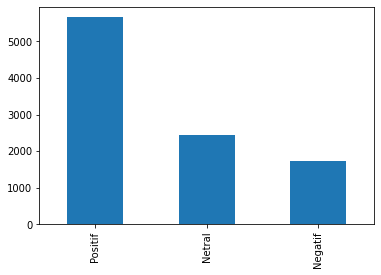

In [ ]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar()
n = len(tweet_df.index)

In [ ]:
tweet_df.drop(tweet_df.columns[[0,1]], axis=1, inplace=True)
data = pd.read_csv('data_clean_twitter.csv')
data['key'] = np.arange(data.index.all())
tweet_df['key'] = np.arange(tweet_df.index.all())
klasifikasi_df = pd.merge(data, tweet_df, on='key', how='inner')
klasifikasi_df.drop('key', axis=1, inplace=True)

klasifikasi_df = klasifikasi_df[klasifikasi_df.Sentiments != 'Netral']
klasifikasi_df.reset_index(drop=True, inplace=True)

s_1 = klasifikasi_df[klasifikasi_df['Sentiments']=='Positif'].sample(1000, replace=True)
s_2 = klasifikasi_df[klasifikasi_df['Sentiments']=='Negatif'].sample(1000, replace=True)
klasifikasi_df = pd.concat([s_1,s_2])

s = pd.value_counts(klasifikasi_df['Sentiments'])
ax = s.plot.bar()
n = len(klasifikasi_df.index)

ValueError: ignored

In [ ]:
allWords = ' '.join([tweet for tweet in klasifikasi_df['TextTweet']])
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(allWords)
fig = plt.figure(figsize = (12,10), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#kata dengan sentiment positif
kata_positif = ' '.join([tweet for tweet in klasifikasi_df['TextTweet'][klasifikasi_df.Sentiments == 'Positif']])
wordcloud_pos = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(kata_positif)
fig = plt.figure(figsize = (12,10), facecolor=None)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#kata dengan sentiment negatif
kata_negatif = ' '.join([tweet for tweet in klasifikasi_df['TextTweet'][klasifikasi_df.Sentiments == 'Negatif']])
wordcloud_pos = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(kata_negatif)
fig = plt.figure(figsize = (12,10), facecolor=None)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
klasifikasi_df.to_csv('data_klasifikasi_tweet.csv', encoding='utf8', index=False)
klasifikasi_df

# Pemodealan Data

Naive Bayes

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y = klasifikasi_df['Sentiments']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(klasifikasi_df['TextTweet'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
pred=NB_classifier .predict(X_test)
metrics.accuracy_score(y_test, pred)

In [ ]:
#Prediciting the test results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix Naive Bayes", fontdict = {'size':18}, pad = 20)

In [ ]:
#Classification report
print(classification_report(y_test, y_predict_test))

Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train)
predsvm =clf.predict(X_test)
metrics.accuracy_score(y_test, predsvm)

In [ ]:
#Prediciting the test results
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix SVM", fontdict = {'size':18}, pad = 20)

In [ ]:
#Classification report
print(classification_report(y_test, y_predict_test))

In [ ]:
import string, re

def cleansing(data):
    data=data.lower()

    remove = string.punctuation
    translator = data.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)

    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'',data)

    data = data.replace('\n', ' ')

    return data


def preprocess_data(data):
    data = cleansing(data)
  
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)

    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)

    data = vectorizer.transform([data])

    return data

In [ ]:
tweet_positif = 'vaksin membuat kebal dari covid-19'
tweet_negatif = 'setelah vaksin, badan menjadi sakit'

clf.predict(preprocess_data(tweet_positif))
clf.predict(preprocess_data(tweet_negatif))